# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


In [76]:
# libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sk.learn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score

In [77]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [78]:
df.shape

(947, 8)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [80]:
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

# **Investigating Categofical Columns**

In [81]:
cat_columns = ['servings', 'category', 'high_traffic']

for col in cat_columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in servings: ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
Unique values in category: ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
Unique values in high_traffic: ['High' nan]


In [82]:
for col in cat_columns:
    value_count = df[col].value_counts()
    print(f"value count in {col}: {value_count}")

value count in servings: 4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64
value count in category: Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
value count in high_traffic: High    574
Name: high_traffic, dtype: int64


# **Modifying Data & Correcting Dtypes**

In [83]:
df['servings'] = df['servings'].str.extract('(\d+)').astype(int)
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')
df['high_traffic'] = df['high_traffic'].replace(0, np.nan)
df['high_traffic'].fillna('Low', inplace=True)
df = df.drop(columns=['recipe'])

In [84]:
print(df['servings'].unique())
print(df['category'].unique())
print(df['servings'].dtype)


[6 4 1 2]
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken'
 'Lunch/Snacks' 'Vegetable' 'Meat' 'Dessert']
int64


# **Investigating Numerical Columns**

In [85]:
df.describe()

,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,947.000000
mean,435.939196,35.069676,9.046547,24.149296,3.477297
std,453.020997,43.949032,14.679176,36.369739,1.732741
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.430000,8.375000,1.690000,3.195000,2.000000
50%,288.550000,21.480000,4.550000,10.800000,4.000000
75%,597.650000,44.965000,9.800000,30.200000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


In [86]:
df[df['protein']==0]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
468,27.11,22.63,4.93,0.0,Beverages,1,Low
812,550.71,11.53,0.35,0.0,Potato,2,High


# **Data Validation**

The dataset has **947** rows, **8** columns. I have validated all variables and discovered discrepancy in the data that does not match the given dictionary, here is what I found:  
- Recipe: Numeric, unique identifiers, same as described. No cleaning needed 
- Calories: Numeric, has 52 missing values. 
- Carbohydrate: Numeric, has 52 missing values 
- Sugar: Numeric, has 52 missing values
- Protein: Numeric, has 52 missing values 
- Category: Character, has 12 categories, one of which is inconsistent with our dictonary: "Chicken Breast"
- Servings: Not Numeric as described, contains 6 values, two of it is inconsistent with our dictonary: '4 as a snack' , '6 as a snack'
- High_traffic: Character, has only one value, contains 373 missing values.

After analysis i have decided to apply the following changes to the data to further analysis and enable modeling:
- Category: Since 'chicken breast' and 'chicken' are the similar, I've consolidated these entries as 'chicken'.
- Servings: To ensure consistency, only the numerical components of the entries were retained.
- High_traffic: Given its significance as our target variable, the substantial missing data was populated with the label 'Low', to create a clear distinction for our target feature.
- Recipe: I have excluded receipe from the data because it will not be needed in our analysis
~~~~

# Exploratory Data Analysis

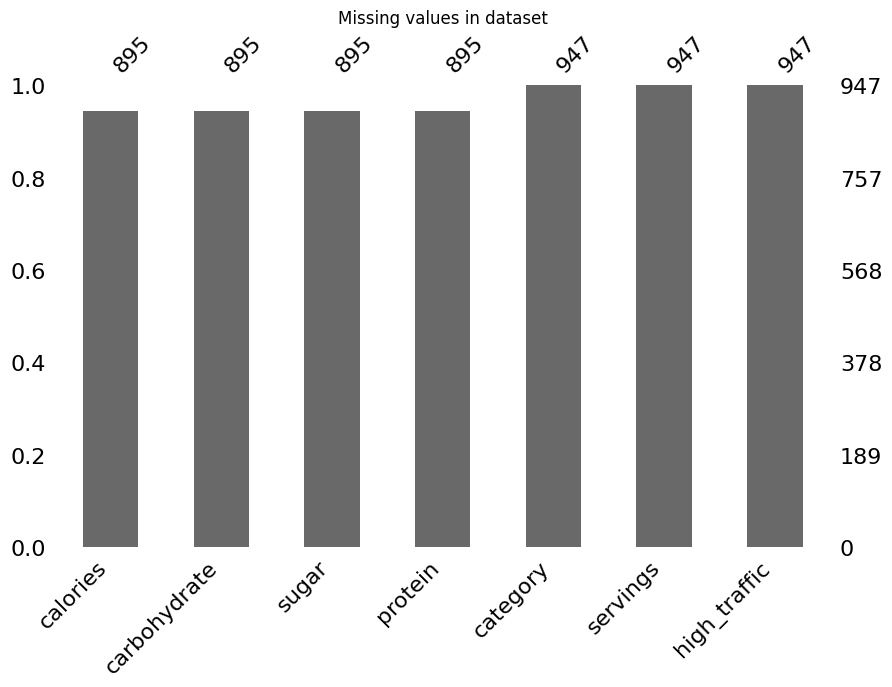

In [87]:
msno.bar(df, figsize=(10, 6))
plt.title('Missing values in dataset')
plt.show()

Missing values visualisation: Calories,Carbohydrate,sugar and protein have equal number of missing values

In [88]:
num_cols = ['calories', 'sugar', 'carbohydrate', 'protein']

# get the indices of missing values for each column
missing_indices = [set(df[df[col].isnull()].index) for col in num_cols]
# intersect the indices
common_missing = set.intersection(*missing_indices)
if len(common_missing) == 52:
    print("The missing values for the columns are in the same rows.")
else:
    print("The missing values for the columns are not in the same rows.")


The missing values for the columns are in the same rows.



* here we are checking to see if missing values are in the same rows to determine how to handle it. now we will visually inspect to see if there are any patterns or if values are missing completely at random

In [89]:
missing_rows = df[df[num_cols].isnull().any(axis=1)]
missing_rows

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,High
23,NaN,NaN,NaN,NaN,Meat,2,Low
48,NaN,NaN,NaN,NaN,Chicken,4,Low
82,NaN,NaN,NaN,NaN,Meat,4,High
89,NaN,NaN,NaN,NaN,Pork,6,High
116,NaN,NaN,NaN,NaN,Chicken,6,High
121,NaN,NaN,NaN,NaN,Dessert,2,High
136,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,NaN,NaN,NaN,NaN,Potato,2,High
187,NaN,NaN,NaN,NaN,Pork,4,High


No patterns are identified and the values appear to be completely missing at random. so manual imputation is not feesible

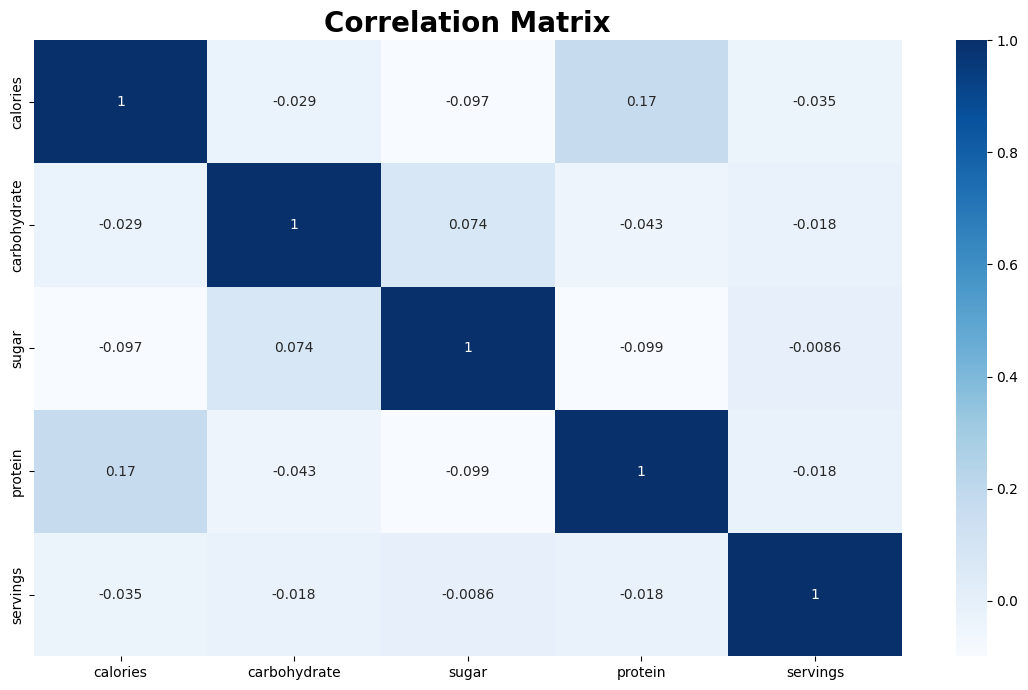

In [90]:
plt.subplots(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correlation Matrix',size=20,fontweight='bold')
plt.show()

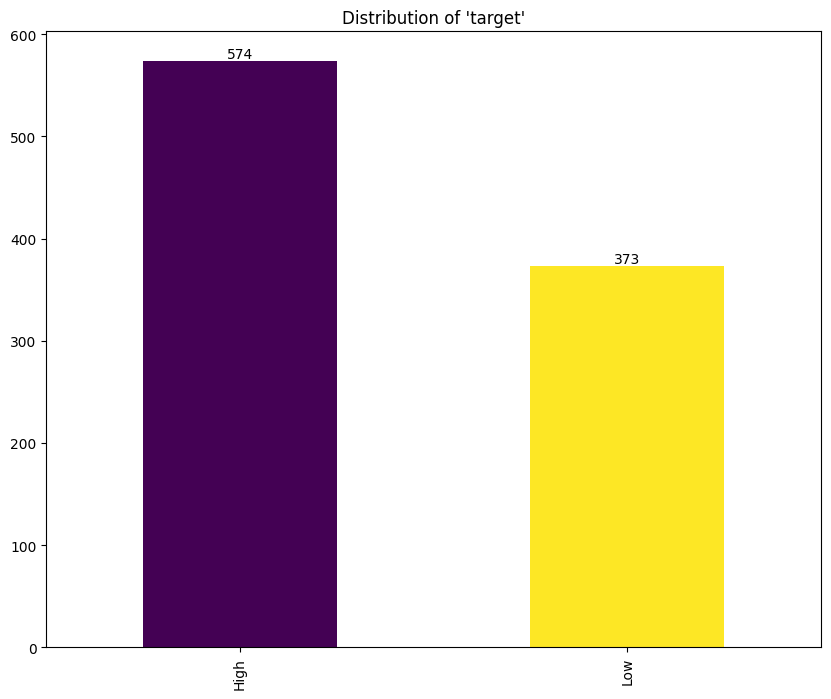

In [91]:
# value counts for target variable
target = df['high_traffic'].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(target)))
ax = target.plot(kind='bar', color=colors, figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Distribution of 'target'")
plt.show()

* More than of half of the recipes in our data generates high traffic
* target variable shows class imbalance

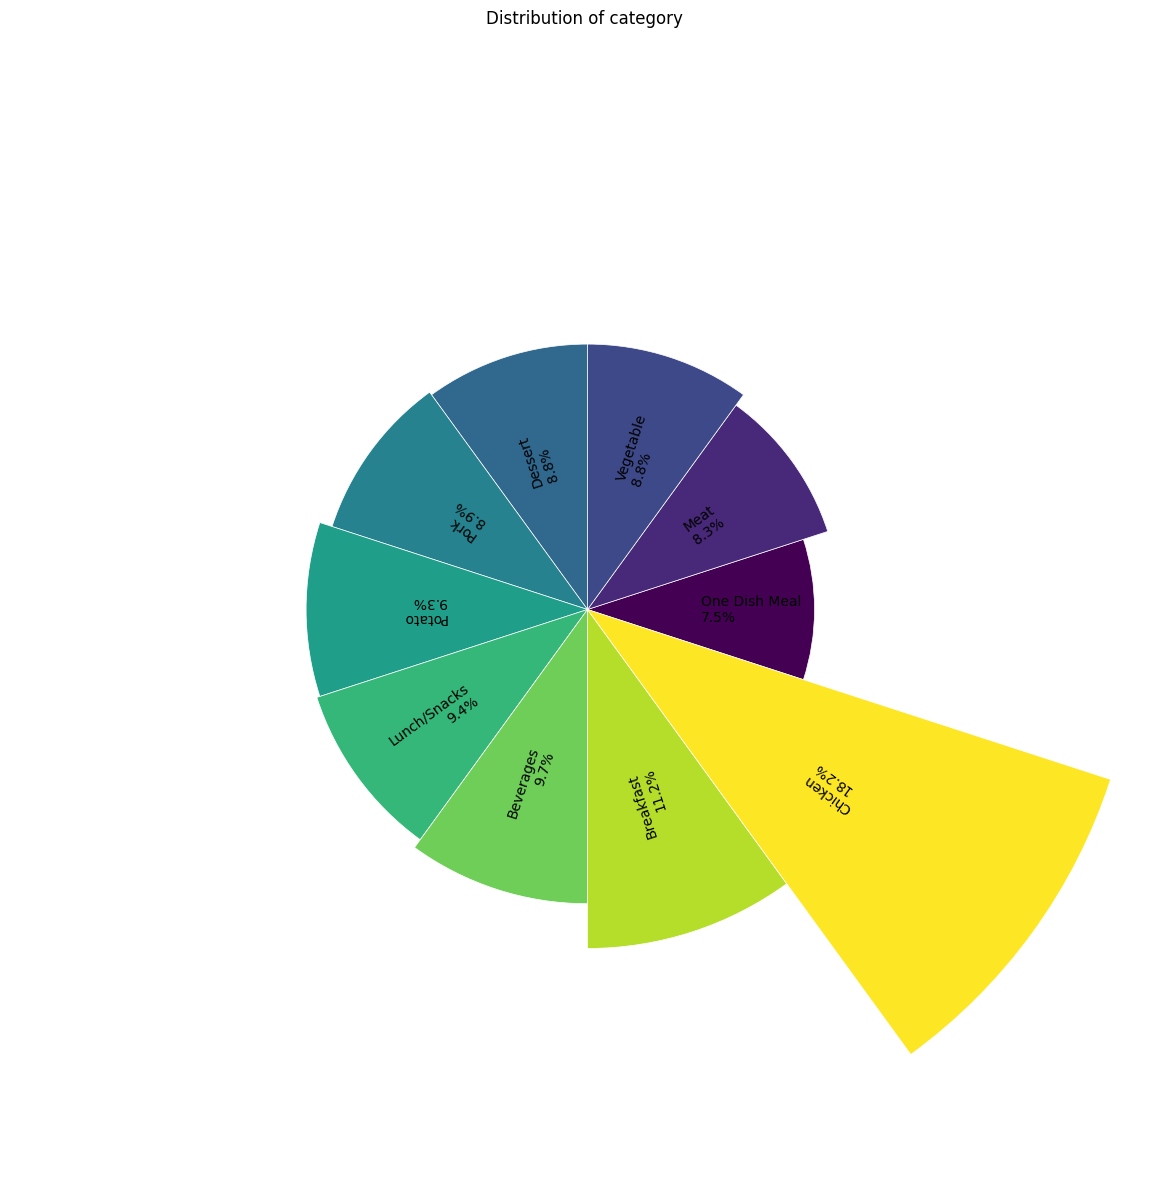

In [92]:
category_counts = df['category'].value_counts(normalize=True) * 100
category_counts = category_counts.sort_values()
categories = category_counts.index
percentages = category_counts.values


fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(polar=True))
theta = np.linspace(0.0, 2 * np.pi, len(categories), endpoint=False)

radii = percentages
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

bars = ax.bar(theta, radii, width=(2*np.pi) / len(categories), align='center', color=colors, edgecolor='white', linewidth=0.5)
for theta_val, bar, category, percentage, radius in zip(theta, bars, categories, percentages, radii):
    rotation = np.rad2deg(theta_val)
    alignment = "left" if 0 <= rotation <= 180 else "right"
    y_position = radius / 2
    
    if alignment == "right":
        rotation = rotation - 180
    ax.text(theta_val, y_position, 
            f'{category}\n{percentage:.1f}%', 
            ha=alignment, va='center', rotation=rotation, rotation_mode='anchor')
ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.grid(False)
ax.axis('off')

plt.title("Distribution of category ")
plt.show()


from the plot we can see that chicken is the most common category, followed by breakfast and beverages, while one dish meal followed by meat and vegetables are the least common receipe category

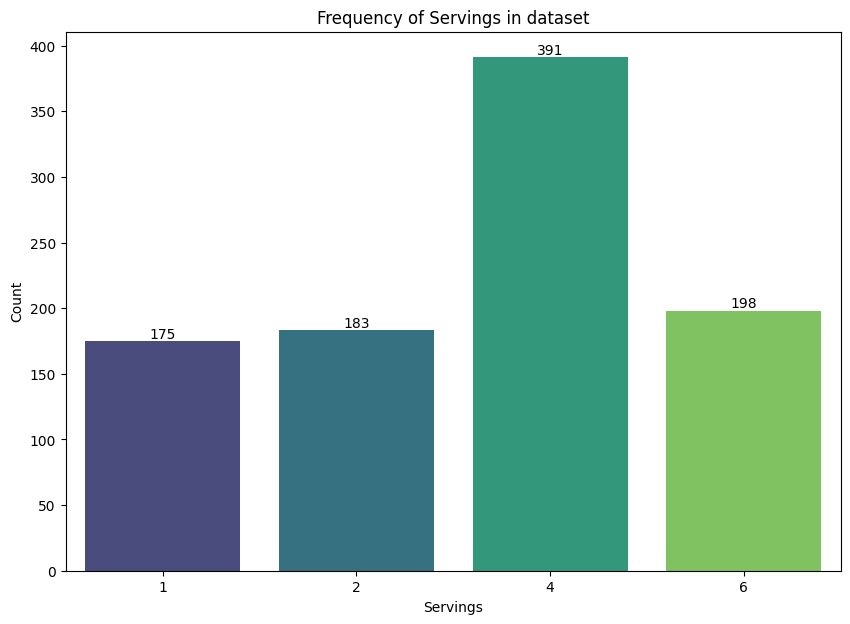

In [93]:
serving_counts = df['servings'].value_counts()

plt.figure(figsize=(10,7))
ax = sns.barplot(x=serving_counts.index, y=serving_counts.values, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Servings')
plt.ylabel('Count')
plt.title('Frequency of Servings in dataset')
plt.show()


* We have four different recipe serving category 
* recipes that serves 4 is the most featured on the website followed by 6 servings

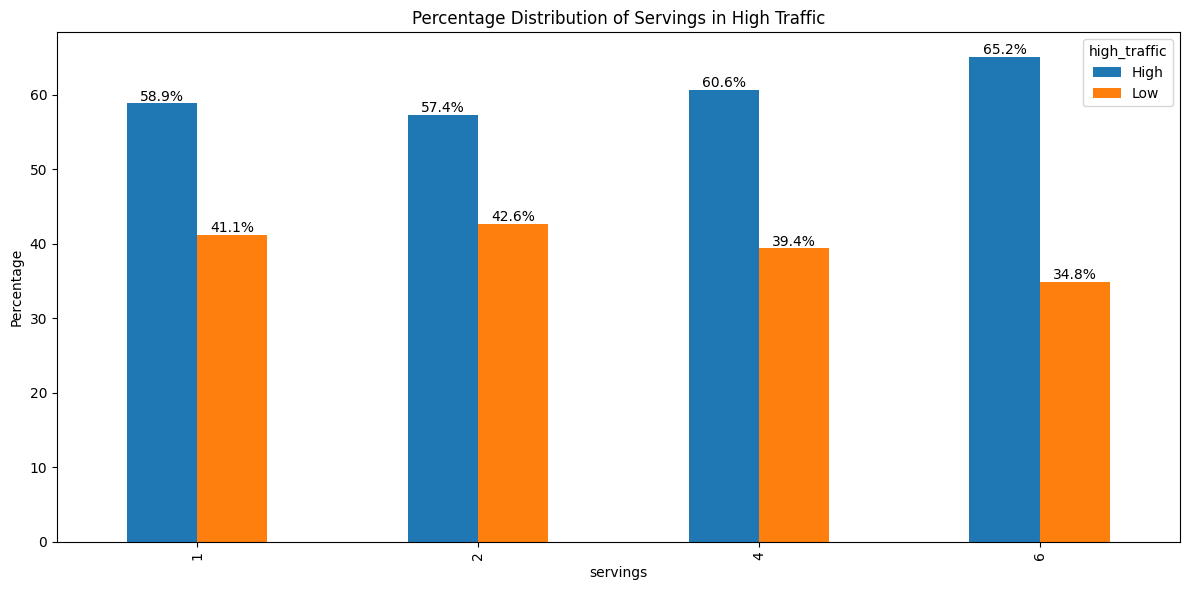

In [94]:
grouped = df.groupby(['servings', 'high_traffic']).size().unstack().fillna(0)
grouped_percentage = (grouped.T / grouped.T.sum()).T * 100

ax = grouped_percentage.plot(kind='bar', stacked=False, figsize=(12, 6))
ax.set_ylabel("Percentage")
plt.title("Percentage Distribution of Servings in High Traffic")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

* From the plot we can see that recipes that serves 6 performs the best followed by 4 serving category.
* we can also note that a significant portion of each serving category experinced high traffic

In [95]:
num_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

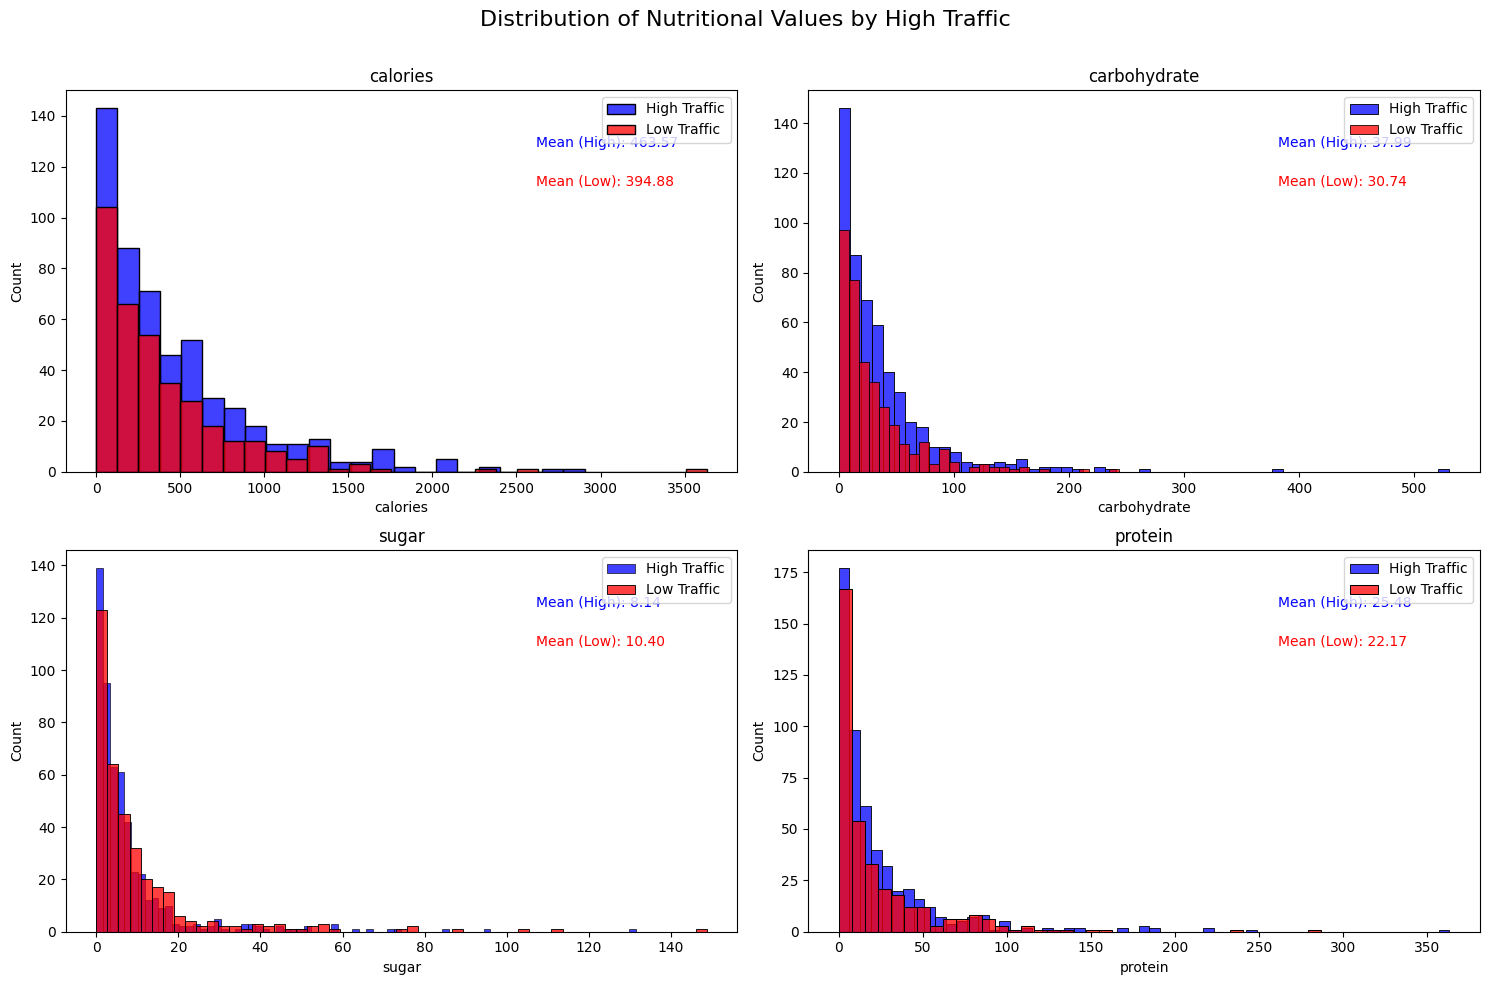

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Nutritional Values by High Traffic', fontsize=16)

axes = axes.ravel()
for i, col in enumerate(num_columns):
    sns.histplot(df[df['high_traffic'] == 'High'][col], ax=axes[i], color='blue', label='High Traffic', kde=False)
    
    sns.histplot(df[df['high_traffic'] == 'Low'][col], ax=axes[i], color='red', label='Low Traffic', kde=False)
    
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')
    axes[i].legend()
    
    high_traffic_values = df[df['high_traffic'] == 'High'][col]
    low_traffic_values = df[df['high_traffic'] == 'Low'][col]
    
    axes[i].annotate(f'Mean (High): {high_traffic_values.mean():.2f}', 
                     xy=(0.7, 0.85), xycoords='axes fraction', fontsize=10, color='blue')
    
    axes[i].annotate(f'Mean (Low): {low_traffic_values.mean():.2f}', 
                     xy=(0.7, 0.75), xycoords='axes fraction', fontsize=10, color='red')

plt.tight_layout()
plt.subplots_adjust(top=0.90) 
plt.show()

from the plot we can see the differences in nutritional values that generate high and those of low traffic. High traffic traffic recipes generally have higher calories, carbohydrate and protein content but lower sugar content on an average compared to low traffic recipes. 

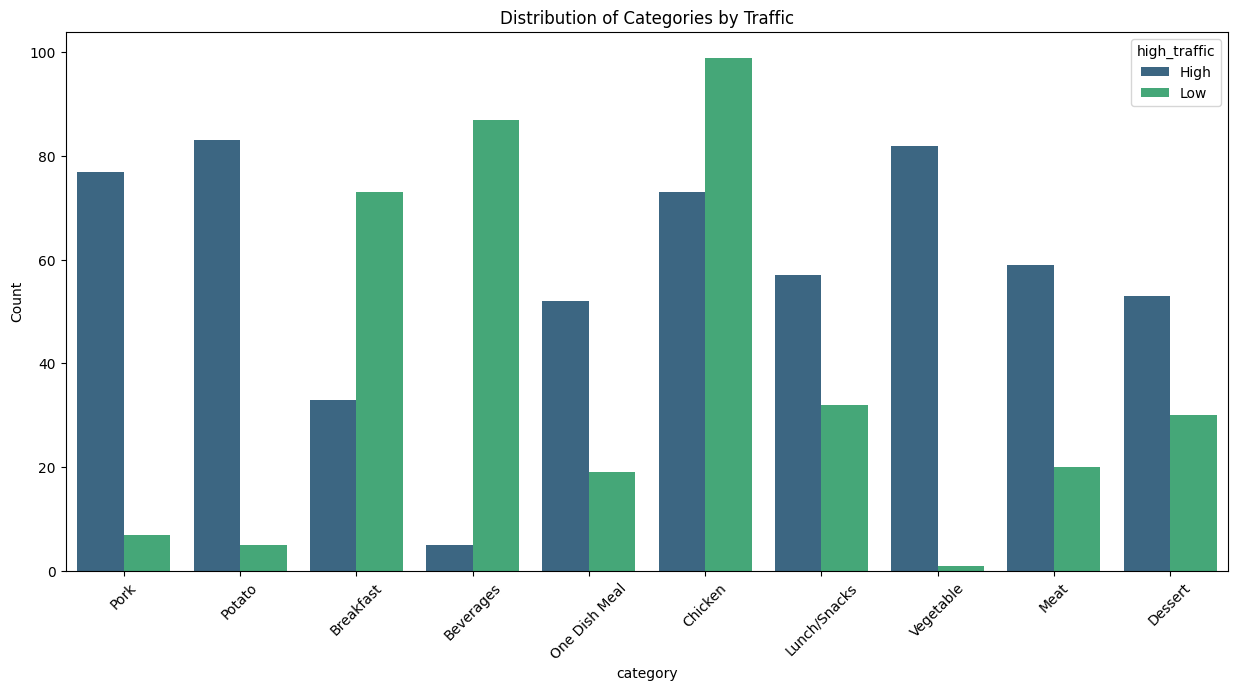

In [97]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='category', hue='high_traffic', palette='viridis')
plt.title('Distribution of Categories by Traffic')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

pork, potato, vegetable all bring in high traffic while, beverages is not very popular with the viewers.

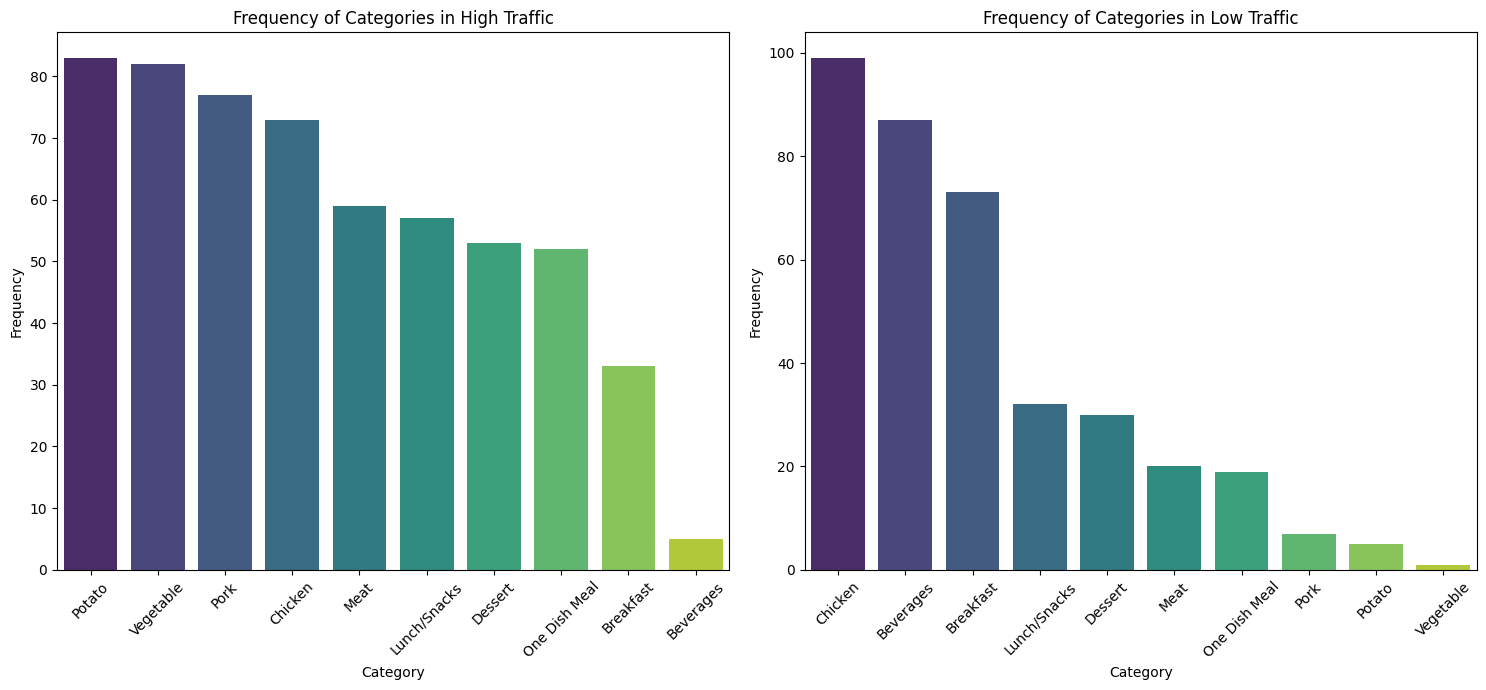

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

traffic_types = ['High', 'Low']

for ax, traffic in zip(axes, traffic_types):
    subset_df = df[df['high_traffic'] == traffic]
    category_counts = subset_df['category'].value_counts()
    
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax, palette='viridis')
    
    ax.set_title(f'Frequency of Categories in {traffic} Traffic')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Category')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


potato, vegetable and pork perform really well as opposed to chicken which is the most frequent category but it doesnt bring in high traffic

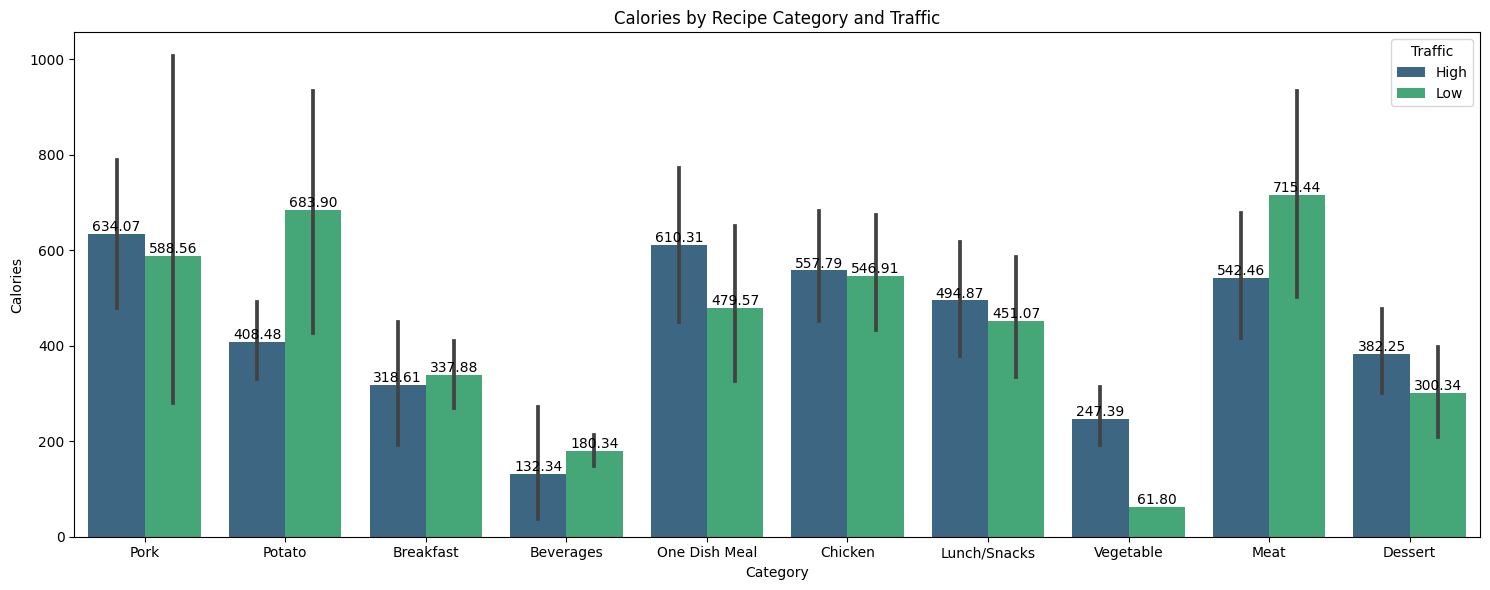

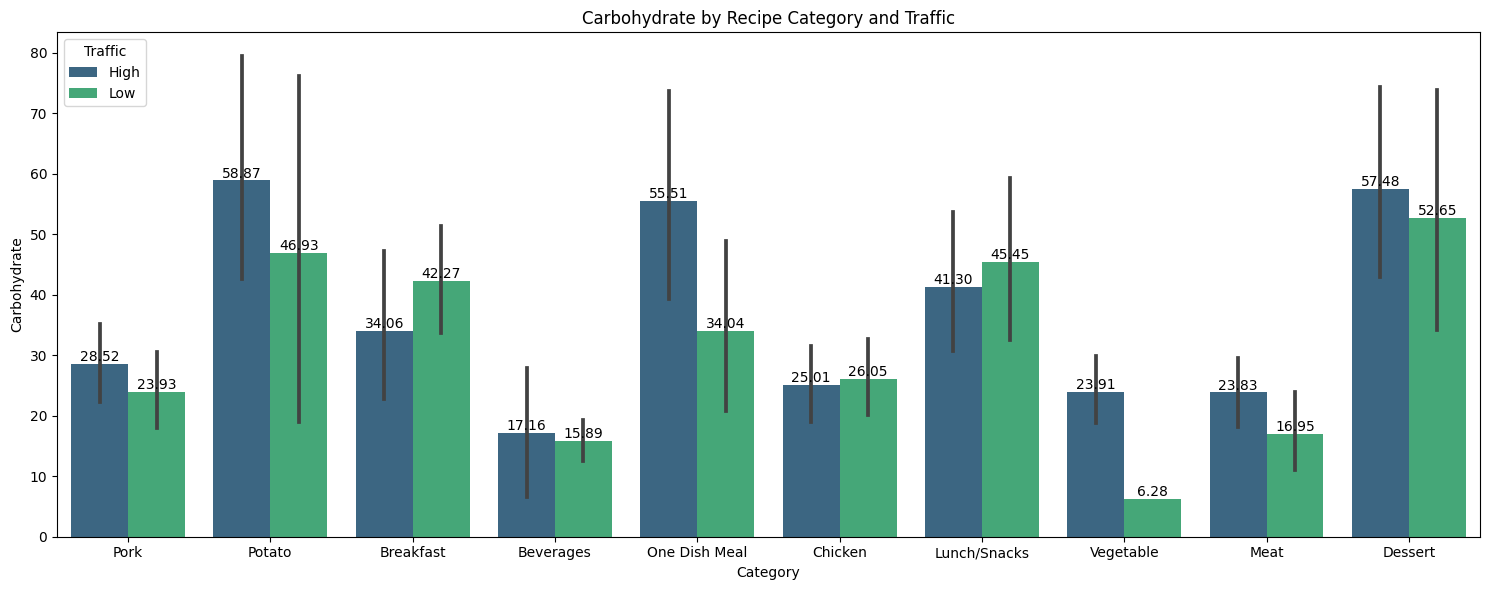

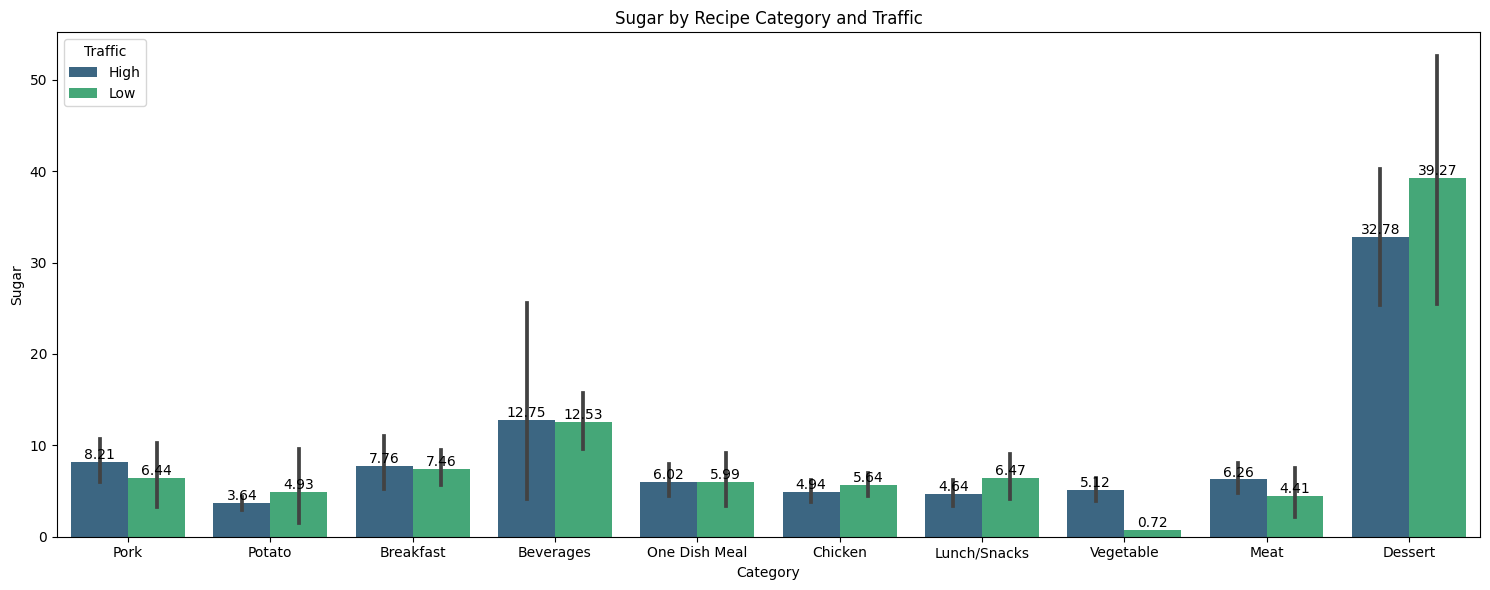

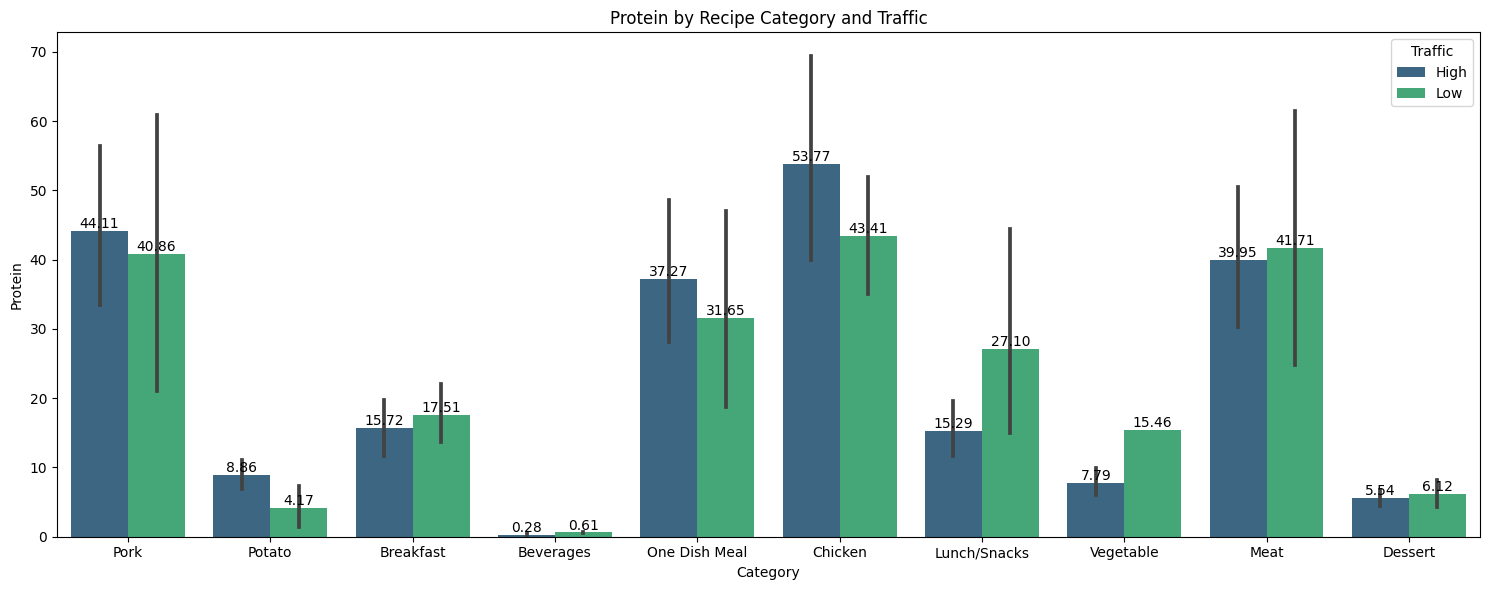

In [99]:
for value in num_columns:
    plt.figure(figsize=(15, 6))
    ax = sns.barplot(data=df, x='category', y=value, hue='high_traffic', palette='viridis')
    plt.title(f'{value.capitalize()} by Recipe Category and Traffic')
    plt.xlabel('Category')
    plt.ylabel(f'{value.capitalize()}')
    plt.legend(title='Traffic')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

* Calories: potato and meat categories have higher calorie content in low traffic. Vegetables have a notable difference in calorie content between high and low traffic with higher calorie content in high traffic. Bevrages have lower calorie content on an average, with its lower calorie content generating high traffic. 
*  Carbohydrate: potato and one dish meal have higher carbohydrate content in high traffic. vegetable has notable difference with higher carbohydrate content generating high traffic
*  sugar: dessert have higher suger content in low traffic compared to its high traffic receipes. potatoes, lunch/snacks as well. while vegetables have higher calorie content having high traffic
*  protein: pork, chicken and one dish meal have slightly higher protein content in high traffic. beverages have the lowest protein conetnt on an average. 

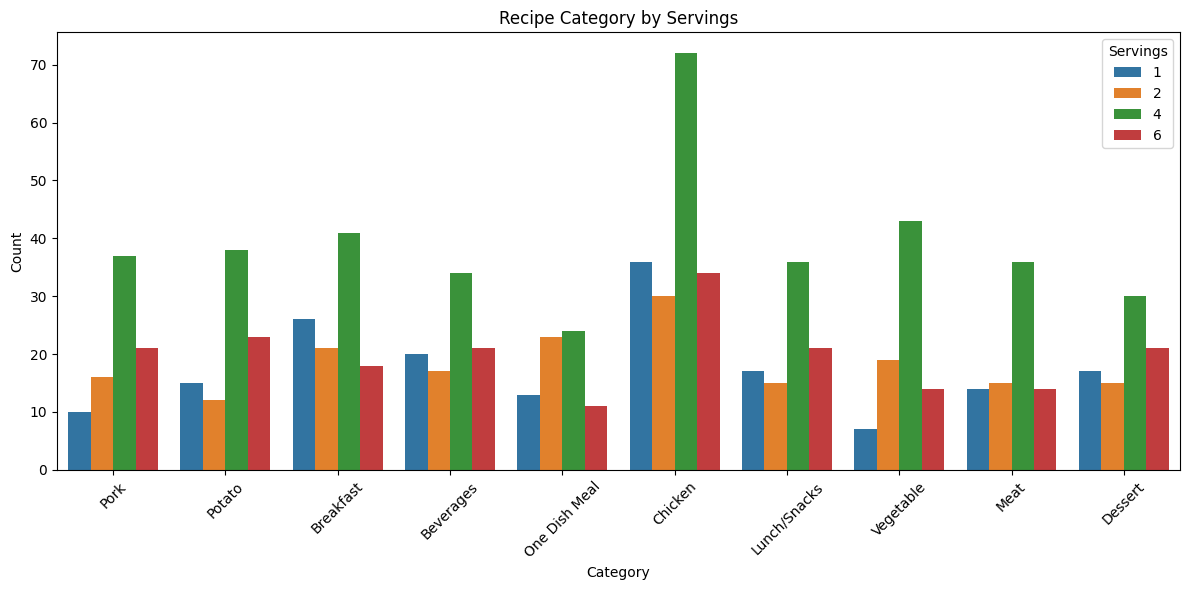

In [100]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='servings')
plt.title('Recipe Category by Servings')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Servings')
plt.tight_layout()
plt.show()


serving distribution varies across the different recipe categories but we can see that 4 servings is the most common.

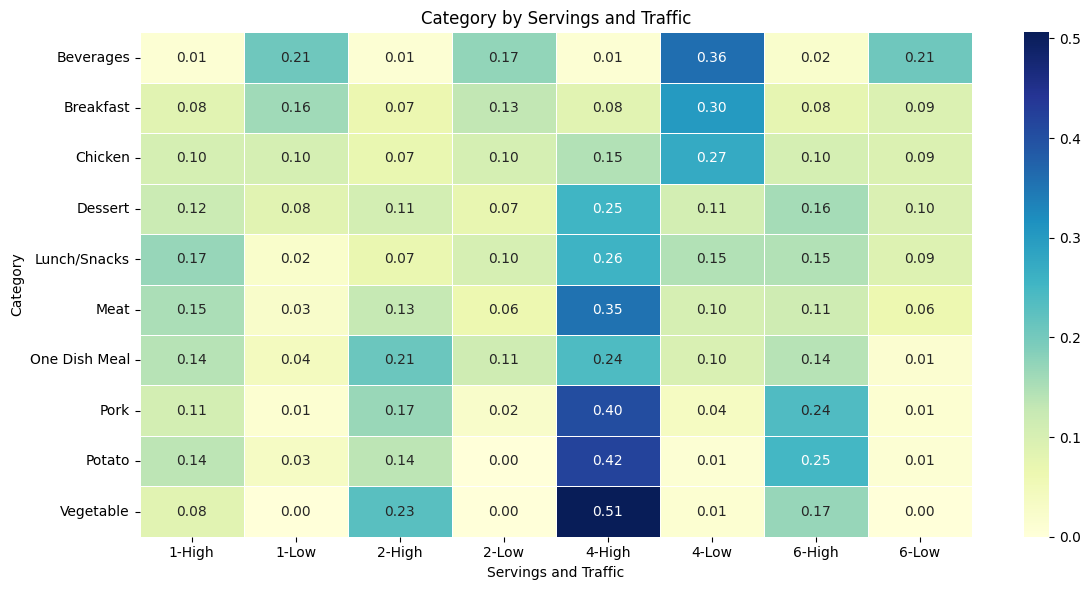

In [101]:
# Create a cross-tabulation
ct = pd.crosstab(index=df['category'], columns=[df['servings'], df['high_traffic']], normalize='index')

plt.figure(figsize=(12, 6))
sns.heatmap(ct, cmap='YlGnBu', cbar=True, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Category by Servings and Traffic')
plt.xlabel('Servings and Traffic')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

from the heatmap we can see that the performance of different recipe category acorss servings vayr, 
in servings 1: lunch is quite popular followed by meat and one dish meal generating high traffic while beverages is strongly associated with low traffic in this category
servings 2: vegetable ,pork and one dish meal are very popular and again beverages, breafast perform the least. 
servings 4: vegetable potato, pork, meat perform really well in this category, while beverages, breakfast and chicken perform the least.
servings 6: potato, pork, vegetable generate high traffic while beverages, desert generate low traffic.


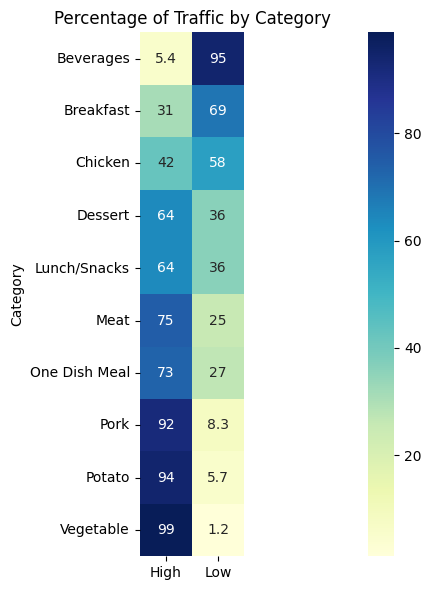

In [102]:
ct = pd.crosstab(df['category'], df['high_traffic'], normalize='index') * 100 

plt.figure(figsize=(25, 6))
sns.heatmap(ct, annot=True, cmap='YlGnBu', cbar=True, square=True)

plt.title('Percentage of Traffic by Category')
plt.ylabel('Category')
plt.xlabel('')
plt.tight_layout()
plt.show()

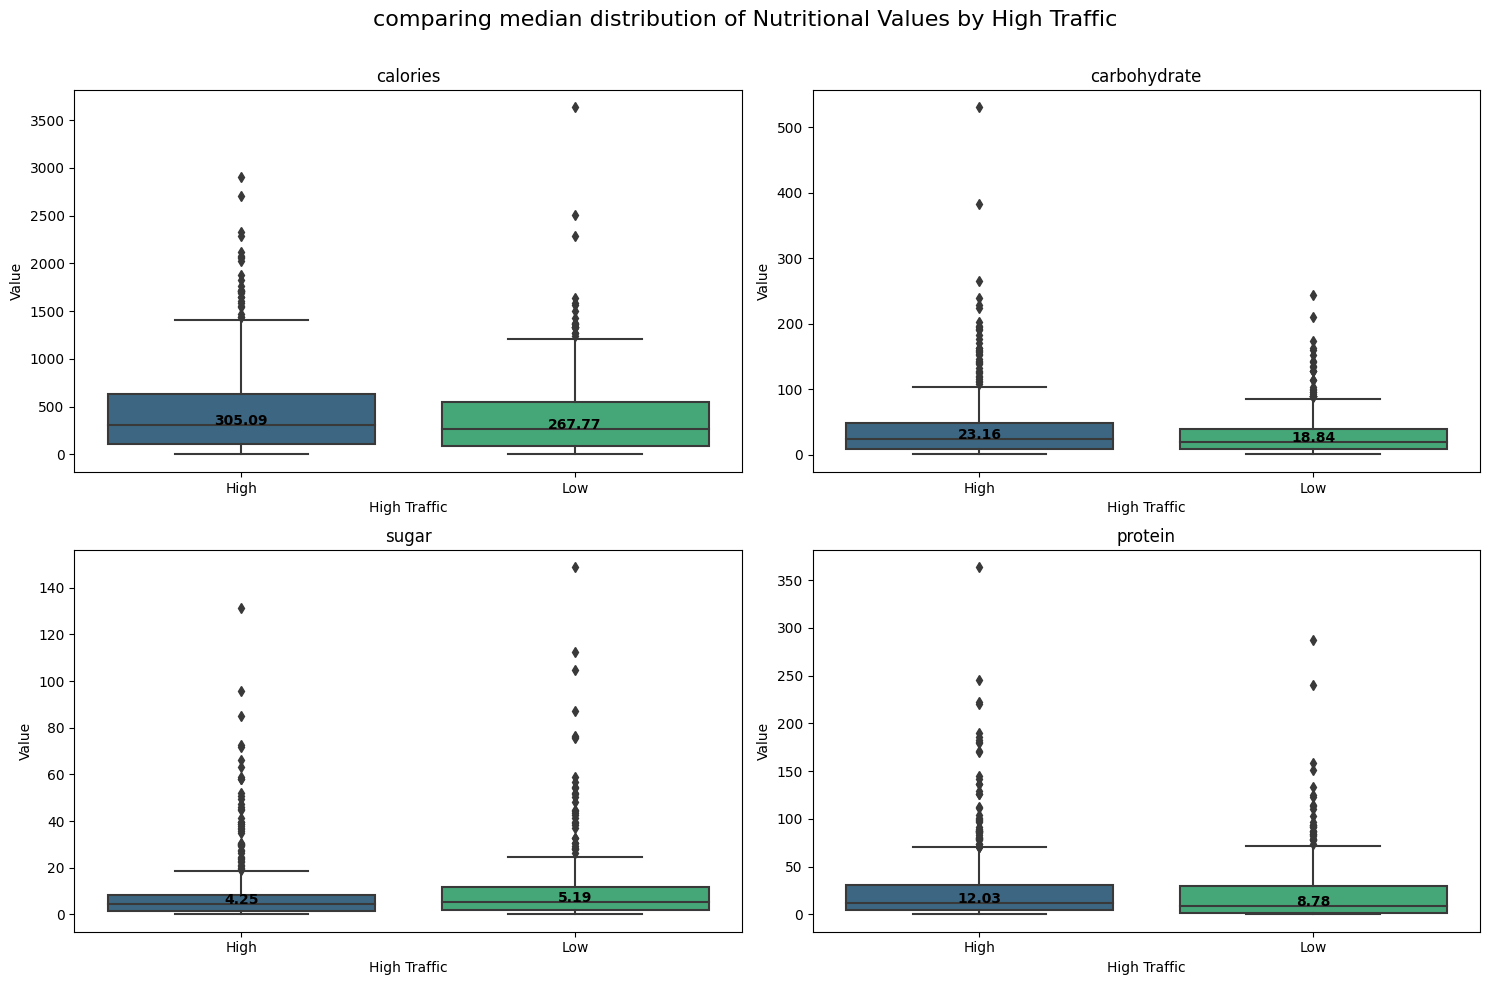

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('comparing median distribution of Nutritional Values by High Traffic', fontsize=16)
axes = axes.ravel()

for i, column in enumerate(num_columns):
    ax = sns.boxplot(x='high_traffic', y=column, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(column)
    axes[i].set_ylabel('Value')
    axes[i].set_xlabel('High Traffic')
    
    for xtick in ax.get_xticks():
        ax.text(xtick, df.groupby('high_traffic')[column].median()[xtick],
                f'{df.groupby("high_traffic")[column].median()[xtick]:.2f}',
                horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

from the plot a trend we can see that is that slightly higher nutritional content generate high traffic except for the case of sugar where lower content generates high traffic. 
we can also see that all nutritional values have data points that slightly deviate from the norm indicating presence of outliers. 

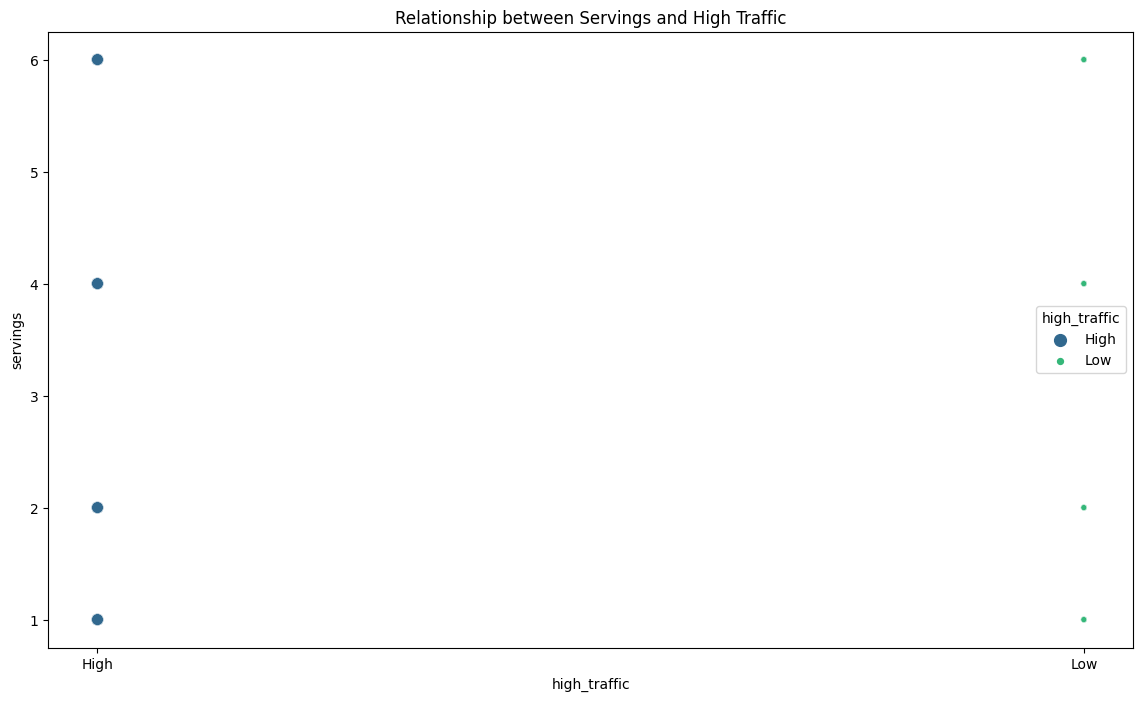

In [104]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df ,x='high_traffic',y='servings',hue='high_traffic',size='high_traffic',palette='viridis')
plt.title("Relationship between Servings and High Traffic")
plt.show()

from the scatter plot we can see that there is no relationship between servings and traffic.

# Handling missing values

since missing values for the nutrient columns are in the same rows we can drop because they make up less than 5% of total data. but we will impute using Random forest because they can handle non linear relationships and automatically consider interactions between variables. to do this we will treat each column as dependent variable and other columns as depenedent variable, then we will predict missing value.

In [105]:
947*0.05

47.35

In [106]:
df.isna().sum()

calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [107]:
train, valid = train_test_split(df, test_size=0.2, random_state=42)

encoder = OneHotEncoder(drop='first')
encoder_columns = ['high_traffic', 'category']
encoded_data = encoder.fit_transform(train[encoder_columns])
encoded_columns = encoder.get_feature_names_out(encoder_columns)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns, index=train.index)
train = pd.concat([train.drop(encoder_columns, axis=1), encoded_df], axis=1)
train

,calories,carbohydrate,sugar,protein,servings,high_traffic_Low,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
109,161.32,32.21,7.15,6.09,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
77,65.52,2.67,0.07,0.51,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
549,473.41,9.91,1.84,6.57,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
843,255.92,157.92,2.18,3.47,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
82,NaN,NaN,NaN,NaN,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,766.01,9.43,0.82,66.71,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
270,457.35,12.74,4.83,21.43,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,207.96,16.55,76.11,1.19,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
435,305.09,21.98,30.60,11.79,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# apply same transformations to validation set
encoded_data_valid = encoder.transform(valid[encoder_columns])
encoded_valid_df = pd.DataFrame(encoded_data_valid.toarray(), columns=encoded_columns, index=valid.index)
valid = pd.concat([valid.drop(encoder_columns, axis=1), encoded_valid_df], axis=1)
valid

,calories,carbohydrate,sugar,protein,servings,high_traffic_Low,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
589,801.72,40.78,4.82,44.03,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
932,1017.32,85.12,1.71,1.85,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
139,13.62,92.02,0.89,44.92,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
86,113.03,23.45,0.47,62.08,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,44.81,4.62,0.40,5.90,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,299.17,20.65,6.34,12.65,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
735,513.75,65.87,18.63,18.39,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
904,449.22,96.11,4.60,6.58,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
543,226.38,13.44,0.45,37.70,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0



* I have encoded both category and target variable. we will now impute missing values in the training set using Random Forest Regressor, and use the trained model to predict and impute missing values in the validation set to ensure that the data is complete. By fitting the imputation model on the training data alone and not the combined dataset i want to make sure that the information from the validation set does not influence the training set.

In [109]:
for column in num_columns:
    print(f"Imputing {column}...")

    # training data for imputation
    X_imp_train = train.dropna(subset=[column]).drop(num_columns + ['servings'], axis=1)
    y_imp_train = train.dropna(subset=[column])[column]

    # Data with missing values to predict on
    X_missing = train[train[column].isnull()].drop(num_columns + ['servings'], axis=1)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_imp_train, y_imp_train)

    imputed_values = model.predict(X_missing)
    train.loc[train[column].isnull(), column] = imputed_values

    #predict and impute on the validation set
    X_missing_valid = valid[valid[column].isnull()].drop(num_columns + ['servings'], axis=1)
    if not X_missing_valid.empty:
        imputed_values_valid = model.predict(X_missing_valid)
        valid.loc[valid[column].isnull(), column] = imputed_values_valid

Imputing calories...
Imputing carbohydrate...
Imputing sugar...
Imputing protein...


In [110]:
train.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic_Low,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
109,161.32000,32.210000,7.150000,6.090000,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
77,65.52000,2.670000,0.070000,0.510000,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
549,473.41000,9.910000,1.840000,6.570000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
843,255.92000,157.920000,2.180000,3.470000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
82,522.09933,22.070117,6.147855,38.744977,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [111]:
valid.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic_Low,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
589,801.72,40.78,4.82,44.03,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
932,1017.32,85.12,1.71,1.85,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
139,13.62,92.02,0.89,44.92,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
86,113.03,23.45,0.47,62.08,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,44.81,4.62,0.40,5.90,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [112]:
print(train.shape)
print(valid.shape)

(757, 15)
(190, 15)


# Assessing Imputation results
Since we dont have data to compare against imputed values we will visualize imputed data before and after imputation to validate it. i will do by splitting the dataset in the same 4:1 ratio and setting to the random state to ensure we produce same results.

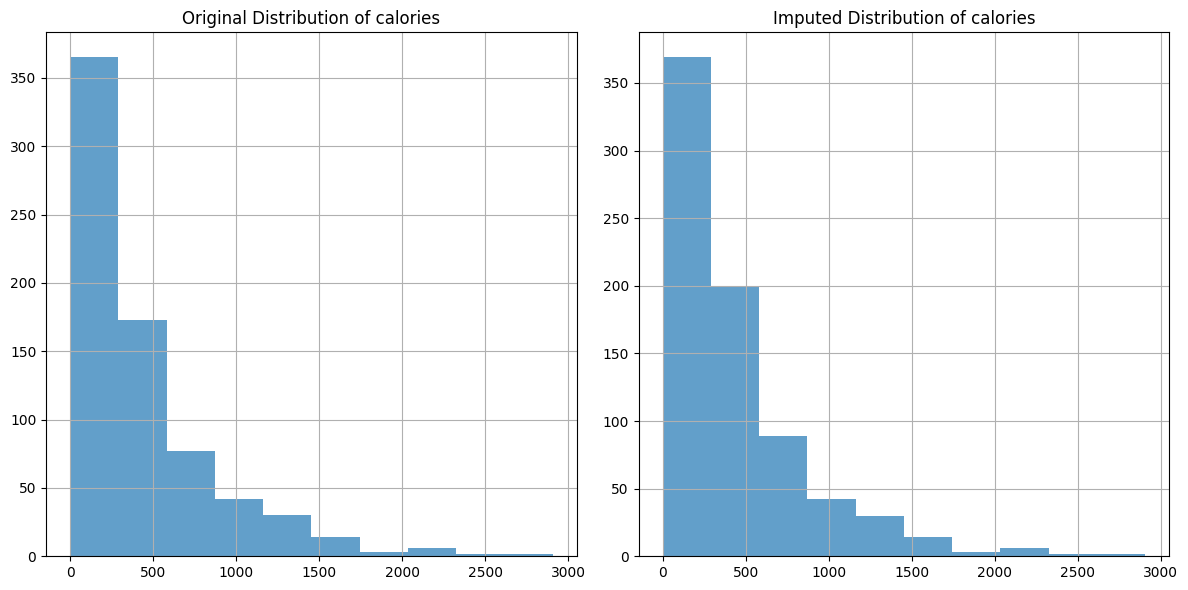

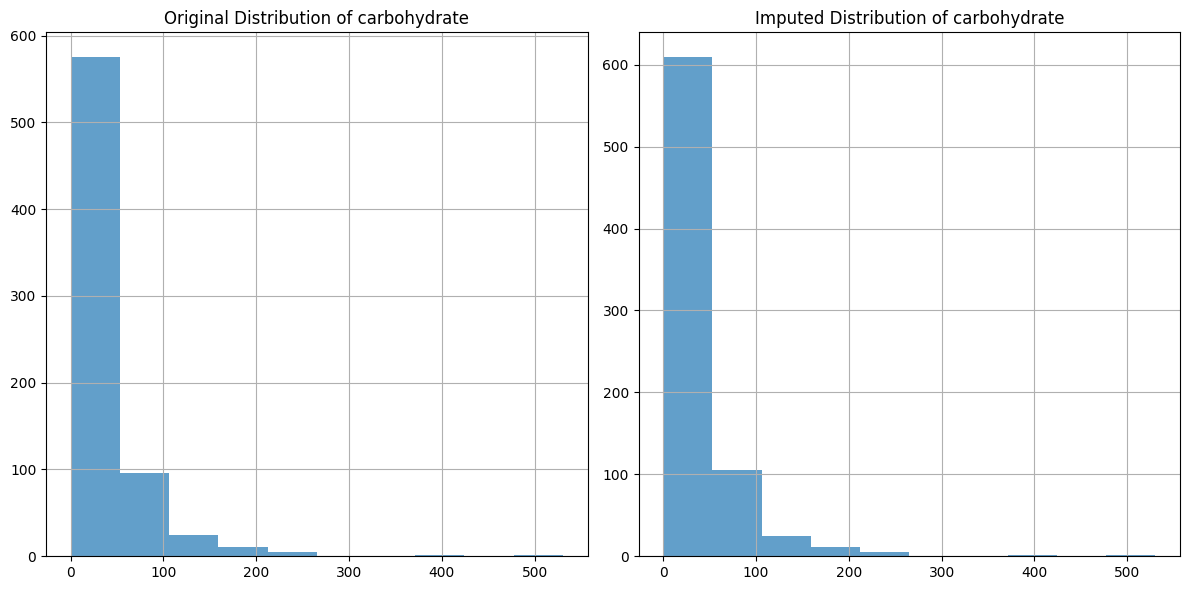

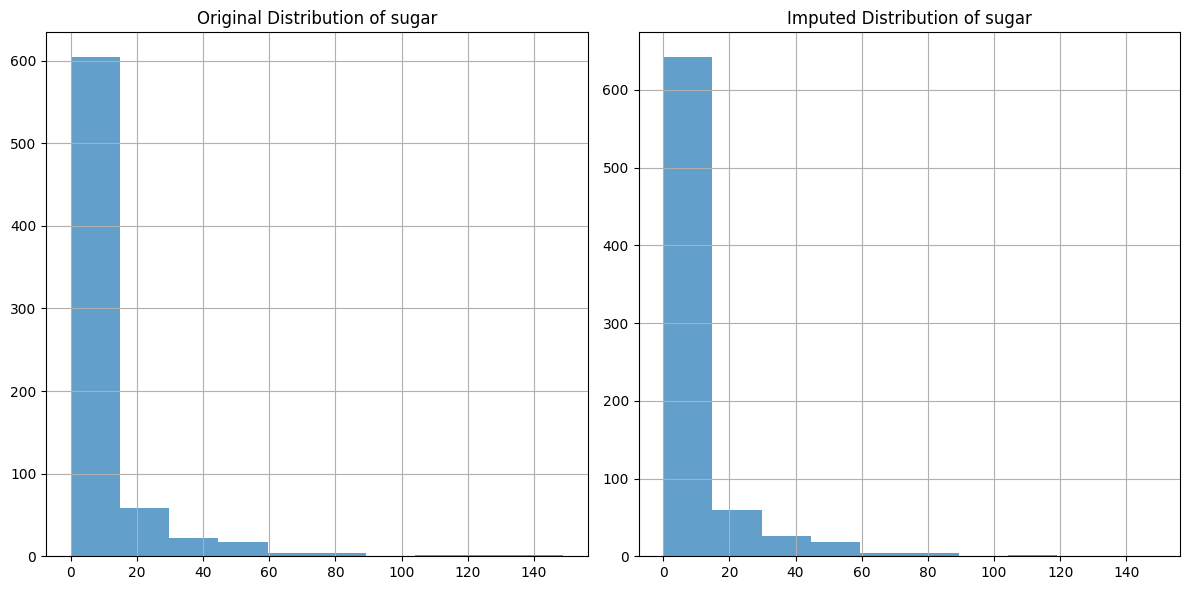

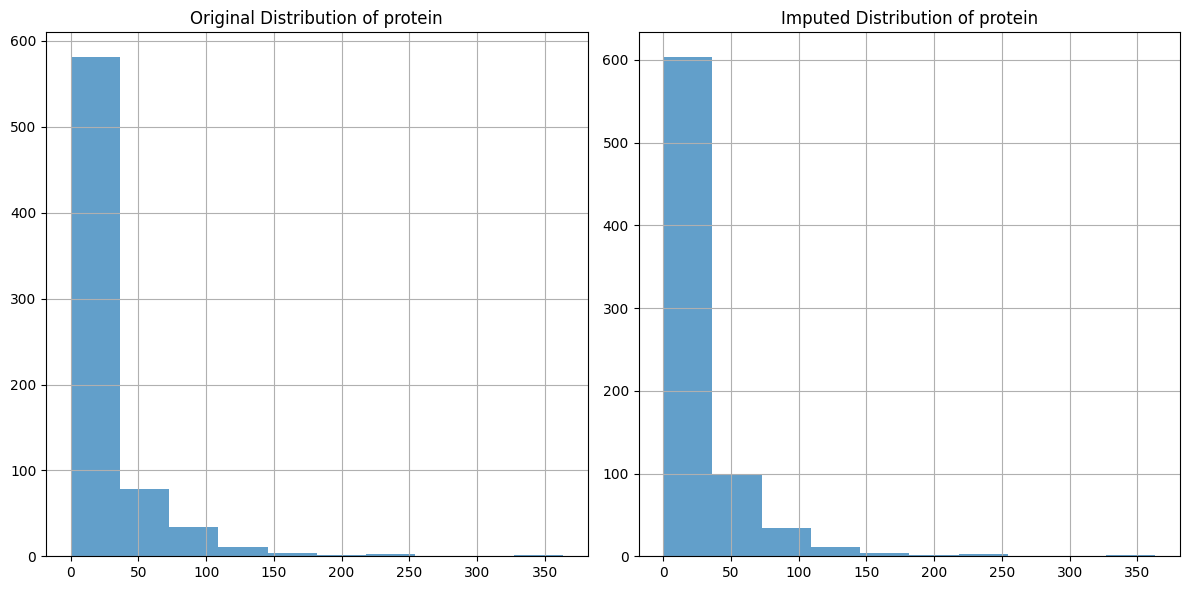

In [113]:
original_train, original_valid = train_test_split(df, test_size=0.2, random_state=42)
for column in num_columns:
    plt.figure(figsize=(12, 6))

    # original data
    plt.subplot(1, 2, 1)
    original_train[column].hist(alpha=0.7)
    plt.title(f'Original Distribution of {column}')

    # imputed data
    plt.subplot(1, 2, 2)
    train[column].hist(alpha=0.7)
    plt.title(f'Imputed Distribution of {column}')

    plt.tight_layout()
    plt.show()

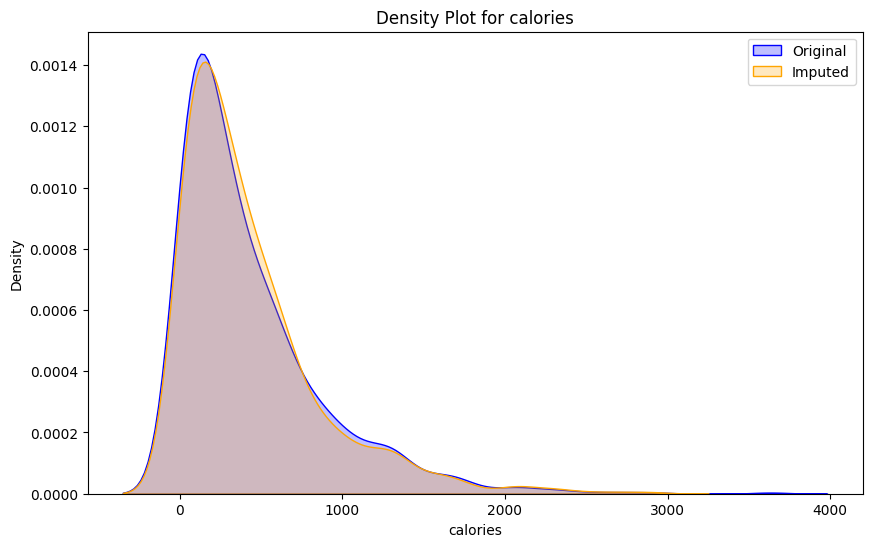

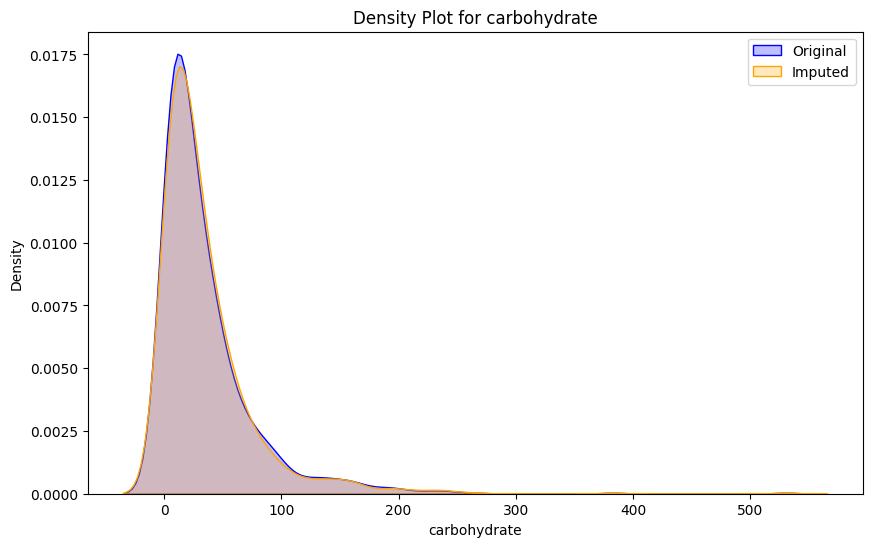

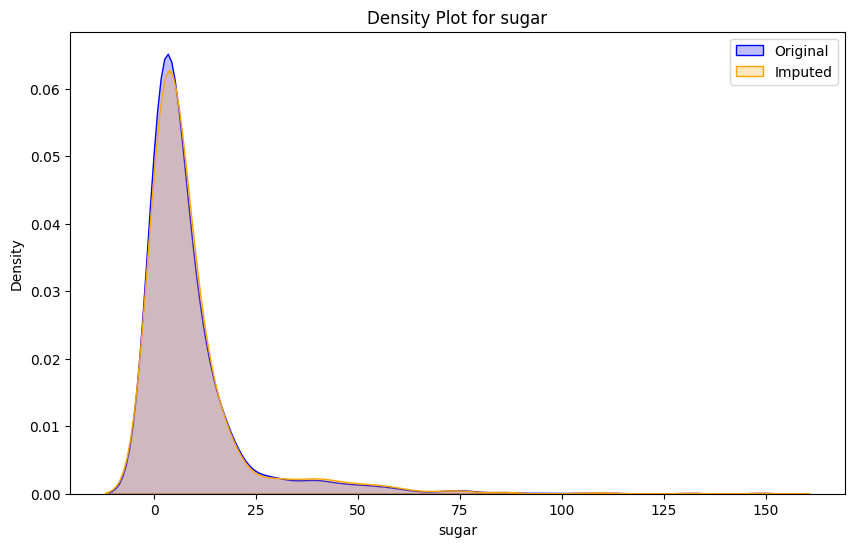

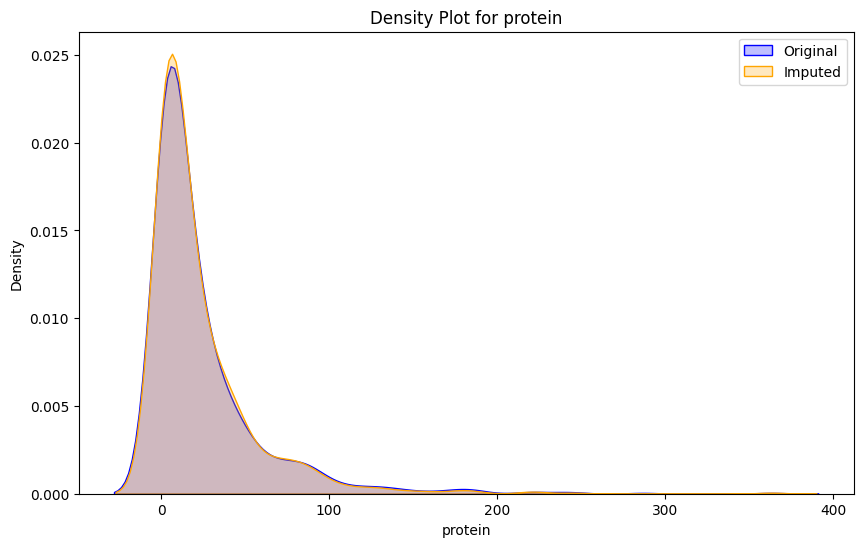

In [114]:
for column in num_columns:
    plt.figure(figsize=(10,6))
    sns.kdeplot(df[column], label='Original', shade=True, color='blue')
    sns.kdeplot(train[column], label='Imputed', shade=True, color='orange')
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


from the histogram and density plot, we can see that the distribution of the nutritional values remains largely unchanged.

In [115]:
for column in num_columns:
    original_mean = original_train[column].mean()
    original_median = original_train[column].median()
    original_std = original_train[column].std()
    imputed_mean = train[column].mean()
    imputed_median = train[column].median()
    imputed_std = train[column].std()
    
    print(f"\nColumn: {column}")
    print("-"*50)
    print(f"Original Mean: {original_mean:.2f} | Imputed Mean: {imputed_mean:.2f}")
    print(f"Original Median: {original_median:.2f} | Imputed Median: {imputed_median:.2f}")
    print(f"Original Std Dev: {original_std:.2f} | Imputed Std Dev: {imputed_std:.2f}")


Column: calories
--------------------------------------------------
Original Mean: 430.87 | Imputed Mean: 434.77
Original Median: 284.80 | Imputed Median: 299.32
Original Std Dev: 448.49 | Imputed Std Dev: 436.96

Column: carbohydrate
--------------------------------------------------
Original Mean: 35.29 | Imputed Mean: 35.34
Original Median: 21.03 | Imputed Median: 22.62
Original Std Dev: 45.70 | Imputed Std Dev: 44.51

Column: sugar
--------------------------------------------------
Original Mean: 9.39 | Imputed Mean: 9.40
Original Median: 4.66 | Imputed Median: 4.97
Original Std Dev: 15.33 | Imputed Std Dev: 15.06

Column: protein
--------------------------------------------------
Original Mean: 22.98 | Imputed Mean: 23.24
Original Median: 10.13 | Imputed Median: 10.75
Original Std Dev: 34.70 | Imputed Std Dev: 33.94



From the statistics results of the data before and after imputation, we can see that the values did not change drastically after imputation, although there is a slight lean to the center of the distribution but however i am happy with the results,this signals that the imputation is preserving the original data distribution.

# Machine learning implementation
Type of problem: Classification.

I am choosing Logistic Regression model as our baseline model and Random forest classifier as our comparison model. both model are very suitable for classification task, they can handle a mix of categorical and numerical features well. 

To evaluate model performance, i will use accurarcy, precision, recall, f1 and the ROC-AUC score, however since the business goals is to predict high traffic recipes 80% or the time i will particulary focus on recall and precision because we want to capture as many high traffic samples as possible. 

## Prepare Data for Modelling
recipe has been excluded earlier so we will use the remaining features for modeling. here are the preparation steps that we will take:
* Covert the categorical columns into numerical features, which we have done earlier using OneHot Encoder.
* Normalize the numerical features 
* balanced target variable using class weight parameter

In [116]:
# rename our target 
train.rename(columns={'high_traffic_Low': 'is_high_traffic'}, inplace=True)
train['is_high_traffic'] = 1 - train['is_high_traffic']

valid.rename(columns={'high_traffic_Low': 'is_high_traffic'}, inplace=True)
valid['is_high_traffic'] = 1 - valid['is_high_traffic']

In [117]:
# define data split
X_train = train.drop('is_high_traffic', axis=1)
y_train = train['is_high_traffic']
X_valid = valid.drop('is_high_traffic', axis=1)
y_valid = valid['is_high_traffic']
print(y_train.unique())

[1. 0.]


# Logistic Regression Model

In [118]:
#Baseline model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
pipeline.fit(X_train, y_train)
log_preds = pipeline.predict(X_valid)  
log_probs = pipeline.predict_proba(X_valid)[:, 1]

print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))
print(classification_report(y_valid, log_preds))

Cross-validation scores: [0.69736842 0.75       0.79470199 0.75496689 0.74172185]
Average accuracy: 0.7477518299058905
              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71        77
         1.0       0.81      0.79      0.80       113

    accuracy                           0.76       190
   macro avg       0.75      0.76      0.76       190
weighted avg       0.76      0.76      0.76       190



* our baseline models has 74% accuracy during cross validation and accuracy of 76% on validation set. 
* Precision on label 1.0 which is 'high' it predicted 81% of samples correctly.
* the baseline model has a recall of 79%, so for all the samples of 'high' in our target it predicted 79% of it correctly.this falls just shy of 1% under the business goals. 

since the business goal is to predict high traffic recipes 80% of the time we will tune the threshold for the model to improve recall. to do this we will compute recall and precision for each treshold and find the threshold closest to our goal of recall of 80%. 

## Tunning the logistic model threshold

In [119]:
thresholds = np.linspace(0, 1, 200)  
recalls = []
precisions = []

for threshold in thresholds:
    preds = (log_probs >= threshold).astype(int)
    recalls.append(recall_score(y_valid, preds))
    precisions.append(precision_score(y_valid, preds, zero_division=1))
idx = np.argmin(np.abs(np.array(recalls) - 0.8))
ideal_threshold = thresholds[idx]

print(f"IdealThreshold: {ideal_threshold}")
print(f"Recall at ideal Threshold: {recalls[idx]}")
print(f"Precision at ideal Threshold: {precisions[idx]}")

IdealThreshold: 0.4271356783919598
Recall at ideal Threshold: 0.7964601769911505
Precision at ideal Threshold: 0.7894736842105263


we can achieve our ideal recall of 80% by setting our model threshold to 0.427. this means that we will be able to predict high traffic recipes 80% of the time however the overall precision of the model will fall to about 79%.

In [120]:
threshold = 0.427
predicted_labels = np.where(log_probs > threshold, 1, 0)
print(classification_report(y_valid, predicted_labels))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        77
         1.0       0.79      0.81      0.80       113

    accuracy                           0.76       190
   macro avg       0.75      0.75      0.75       190
weighted avg       0.76      0.76      0.76       190




we can see from the results that the model has accurately predicted the labels 1.0 which is 'high' 81% of the time by looking at the recall. The accuracy on the validation set is 76% and the precision is 79%.

## Logistic regression model coefficients

In [121]:
coefs = pipeline.named_steps['classifier'].coef_[0]
features = X_train.columns
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs
})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                   Feature  Coefficient
13      category_Vegetable     1.707177
12         category_Potato     1.401014
11           category_Pork     1.257074
7         category_Dessert     0.844647
9            category_Meat     0.793329
8    category_Lunch/Snacks     0.772666
10  category_One Dish Meal     0.732289
6         category_Chicken     0.645317
5       category_Breakfast     0.410084
2                    sugar    -0.136836
1             carbohydrate     0.134137
3                  protein     0.082197
4                 servings     0.021685
0                 calories     0.015640



we can see here that the categories play a very important role in predicting high traffic recipes. The top recipe predictors for high traffic are: vegetable,potato and pork. carbohydrate and protein show slight positive influence, however sugar has a negative cofficient with high traffic. servings and calories does not drive high traffic either.

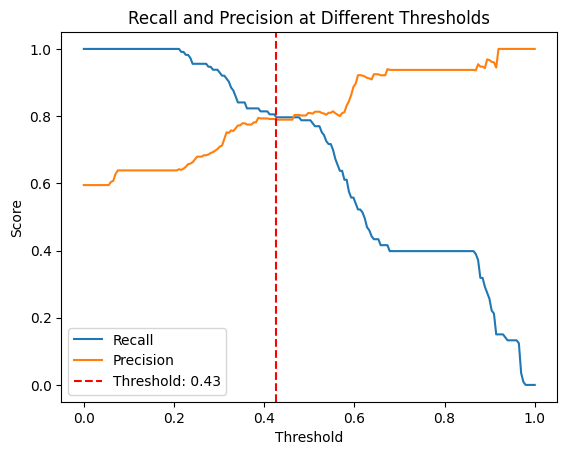

In [122]:
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.axvline(x=ideal_threshold, color='red', linestyle='--', label=f"Threshold: {ideal_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall and Precision at Different Thresholds")
plt.legend()
plt.show()

here we can see the model performance at different thresholds. we can se ethat higher precision valuer the lower the recall.

# Random Forest Classifier(Comparison Model)

In [123]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_valid)
rf_probs = rf_pipeline.predict_proba(X_valid)[:, 1]
print("Cross-validation scores:", rf_scores)
print("Average accuracy:", np.mean(rf_scores))
print(classification_report(y_valid, rf_preds))

Cross-validation scores: [0.69078947 0.67763158 0.75496689 0.70860927 0.72847682]
Average accuracy: 0.7120948065528058
              precision    recall  f1-score   support

         0.0       0.72      0.56      0.63        77
         1.0       0.74      0.85      0.79       113

    accuracy                           0.73       190
   macro avg       0.73      0.70      0.71       190
weighted avg       0.73      0.73      0.72       190



Our comparison model has a cross validation accuracy of 71% and 73% accuracy on the validation set

It has a accurately predicted 85% of the total 'high' traffic recipe samples correclty meeting business objective. 
the overall precision is 74% which is lower than our baseline model. we are going to improve model performance by tunning the hyperparameters 

In [124]:
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                               n_iter=100, cv=5, verbose=0, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [125]:
# making predictions using bets parameters
best_rf = rf_random.best_estimator_
best_rf_preds = best_rf.predict(X_valid)
print(classification_report(y_valid, best_rf_preds))

              precision    recall  f1-score   support

         0.0       0.72      0.56      0.63        77
         1.0       0.74      0.85      0.79       113

    accuracy                           0.73       190
   macro avg       0.73      0.70      0.71       190
weighted avg       0.73      0.73      0.72       190



The model performed slightly better on recall at 88%, however there was a dip in the precision which is still at 73%. The accuracy on validation still remains the same at 73% after the tunning the hyperparameters.

# Calculating confusion matrix

In [126]:
y_true = y_valid
log_confusion = confusion_matrix(y_true, (log_probs > 0.427).astype(int))
rf_confusion = confusion_matrix(y_true, (rf_probs > 0.427).astype(int))
log_fpr, log_tpr, _ = roc_curve(y_true, log_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_true, rf_probs)
log_auc = roc_auc_score(y_true, log_probs)
rf_auc = roc_auc_score(y_true, rf_probs)

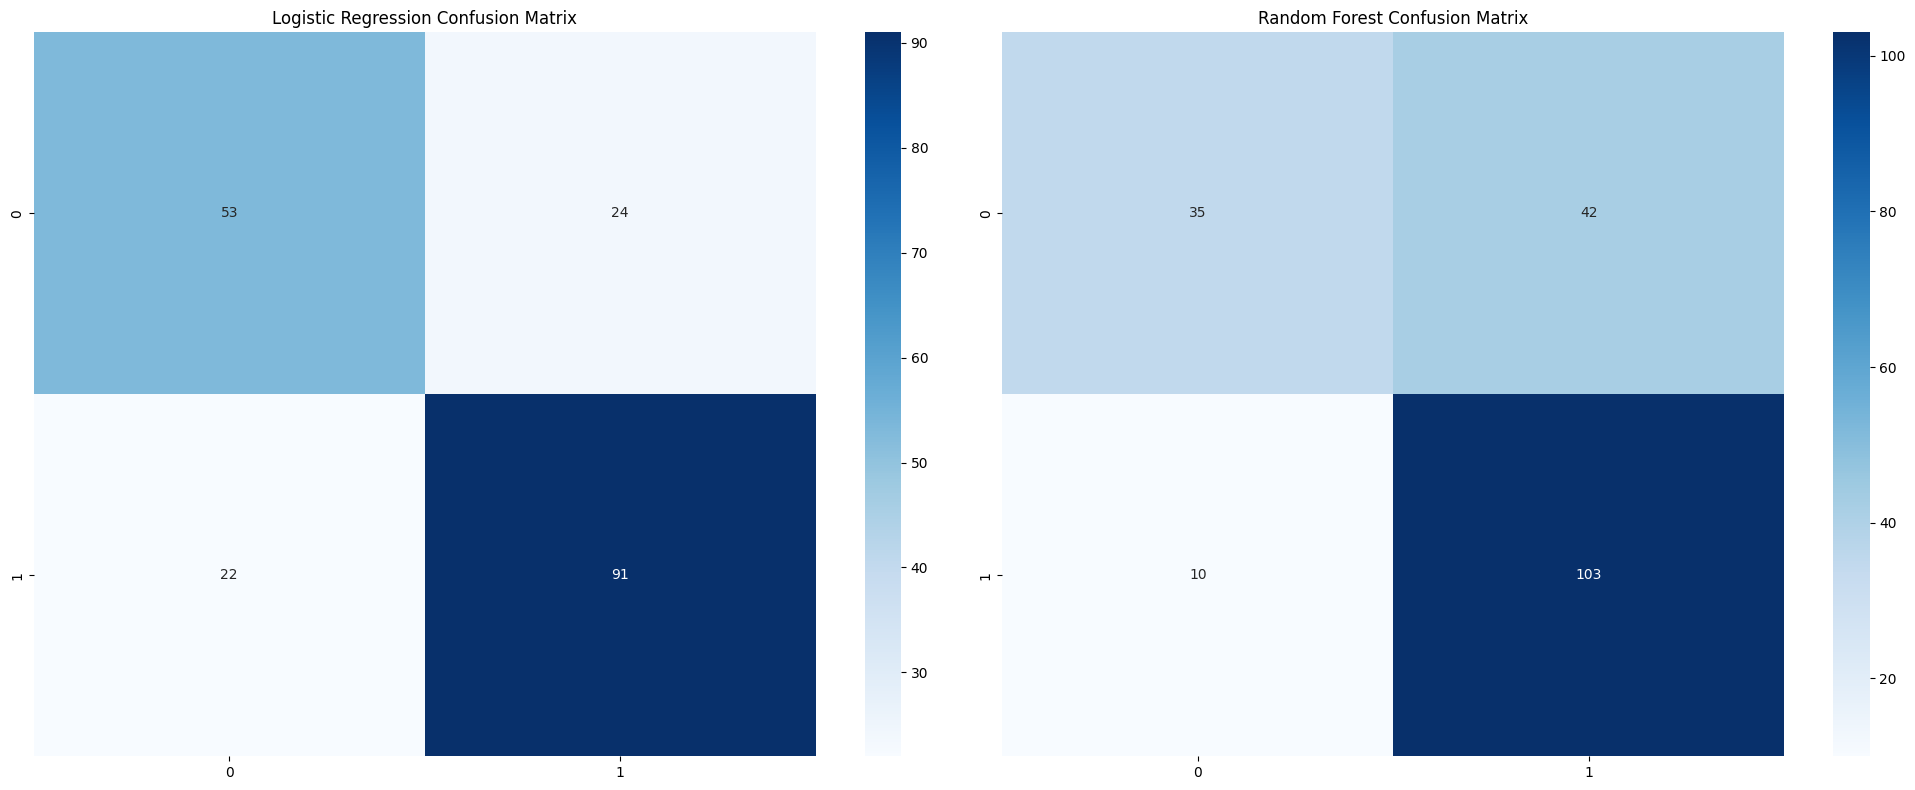

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(log_confusion, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

Logistic regression model:
* it correctly predicted 53 true negatives and 91 true positives. However, it misclassified 24 and 22 instances of false negatives. the model has higher accuracy in predicting negative instances 

Random forest model:
* it correctly predicted 35 true negatives and 103 true positives. however it made more errors in falsely predicting 42 instances of positive as false positives but did better at minimizing false negative with just 10 instances. this model tends to misclassify negative instances more than the Logistic regression model. 

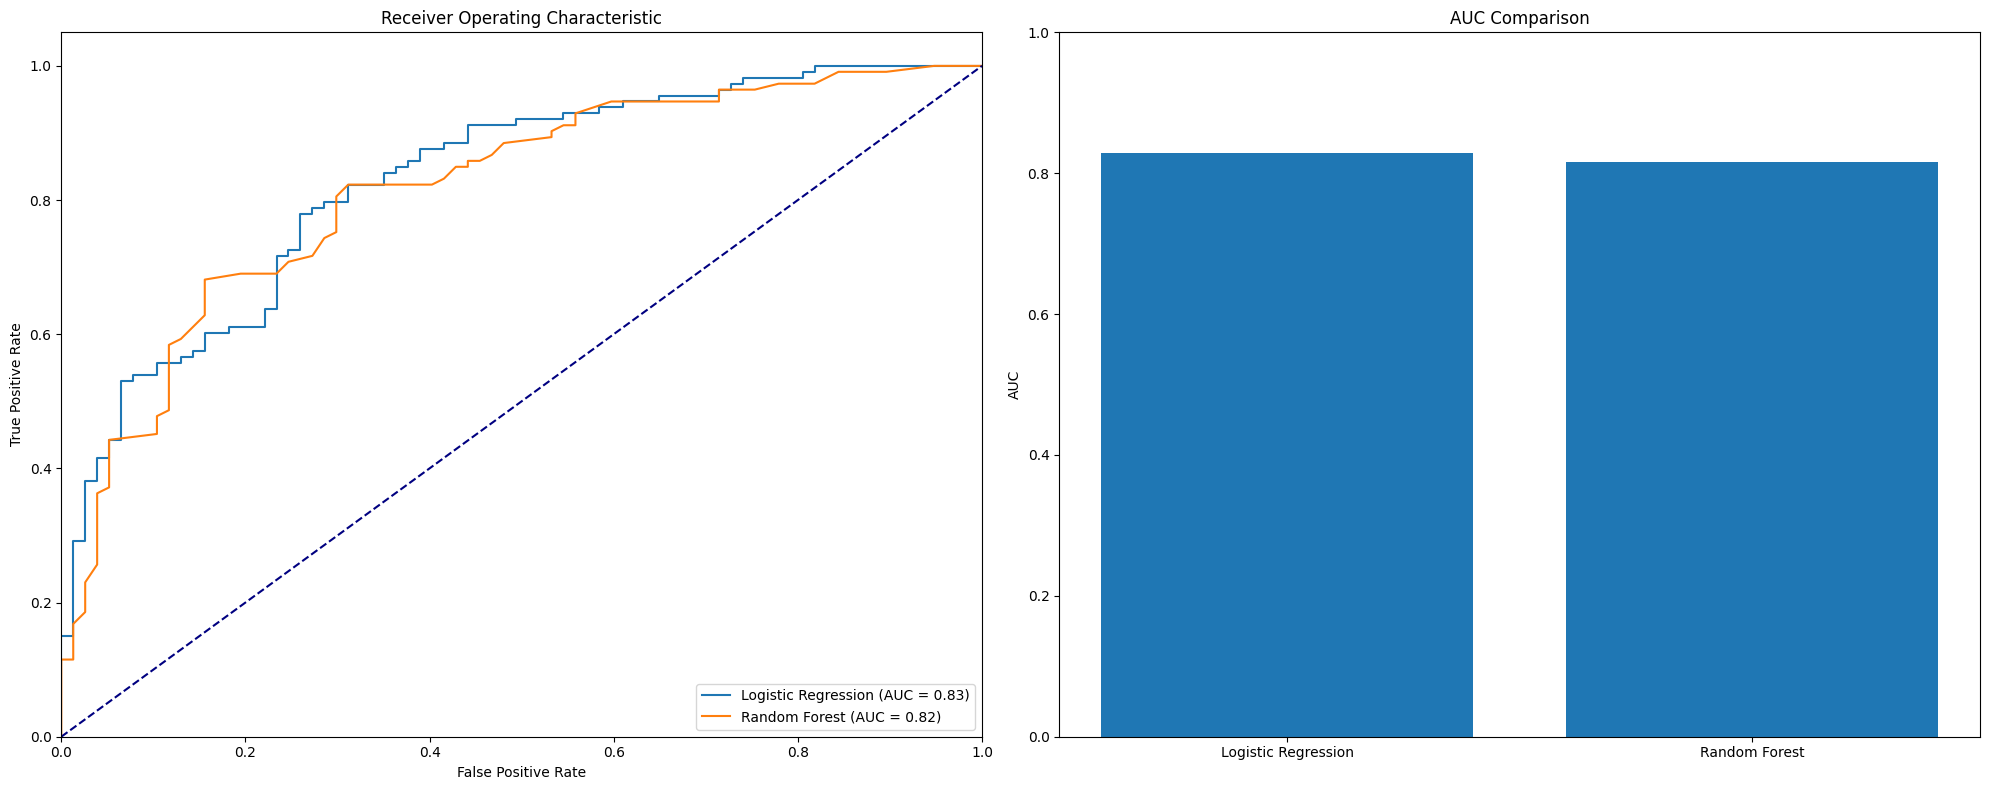

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
axes[0].plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic')
axes[0].legend(loc='lower right')

axes[1].bar(['Logistic Regression', 'Random Forest'], [log_auc, rf_auc])
axes[1].set_ylim([0, 1])
axes[1].set_title('AUC Comparison')
axes[1].set_ylabel('AUC')
plt.tight_layout()
plt.show()


both model auc comparison shows minimal difference, however the logistic regression model does perform better when it comes to discriminating between positive and nagtive classes. again we can see a similar performance when inspecting the ROC curve

# Model Results

In [129]:
models = ["Logistic Regression",
          "Logistic Regression (Adjusted Threshold)", 
          "Random Forest", "Tuned Random Forest"]
predictions = [log_preds, predicted_labels, rf_preds, best_rf_preds]

results = []

for model, pred in zip(models, predictions):
    result = {
        'Model': model,
        'Validation Accuracy': accuracy_score(y_valid, pred),
        'Precision': precision_score(y_valid, pred),
        'Recall': recall_score(y_valid, pred),
        'F1-Score': f1_score(y_valid, pred),
    }
    results.append(result)
    
auc_scores = [roc_auc_score(y_valid, log_probs),
              roc_auc_score(y_valid, log_probs),
              roc_auc_score(y_valid, rf_probs), 
              roc_auc_score(y_valid, rf_probs)]

for res, auc in zip(results, auc_scores):
    res['AUC'] = auc

results_df = pd.DataFrame(results)
results_df

,Model,Validation Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.763158,0.809091,0.787611,0.798206,0.828755
1,Logistic Regression (Adjusted Threshold),0.757895,0.791304,0.805310,0.798246,0.828755
2,Random Forest,0.731579,0.738462,0.849558,0.790123,0.815309
3,Tuned Random Forest,0.731579,0.738462,0.849558,0.790123,0.815309


# Summary and Recomendations

### obejectives:
- Predict which recipes will lead to high traffic
- Correctly predict high traffic recipes 80% of the time
To answer the first objective by studying the logistic model  coeffients we can see recipes that will lead to high traffic. the main predictors of high taffic are: 
* vegetable, potato and pork recipes. other notable recipes are Dessert, meat and lunch/snack categories. 

Objective 2 is to correctly predict high traffic recipes 80% of the time. both models can correctly predict high traffic recipes 80% of the time. to ensure this we are particularly focused on the recall results of each model. because it directly calculates how many of high recipe samples we have correctly predicted. 

Our baseline model which is the logistic regression model with the threshold adjusted correctly predicts 81% of the samples correctly while the random forest model with tuned hyperparameters predicts 88% samples correctly. both model has met this business objective. 

Since the goal is to correctly predict as many high traffic recipes 80% of the time, i would recommend the Random forest model with its tuned hyperparameters because it has a  higher recall value.

### further recommendations:
better performing recipes such as vegetable, pork, potatoes are featured less on the website, these recipes drive more traffic so the business can profit from featuring them more. 
chicken beverages and breakfast are featured more on the website however they dont perform well so they should be and alternated with other categories such as one dish meal, meat etc, which shows promising numbers.
4 and 6 recipe servings are quite popular with readers so they should be incoparted more to boost traffic to the website. 

### How can the business monitor performance: 
Given that we have established the metric as recall, to monitor model performance tasty bytes should evaluate the recommended model(Random Forest Classifier) on new data. during model development we did not have alot of data to work with so evaluating it on new data will highlight (if any) potential issue in model the performnace.

### Baseline metrics: 
Based on our current data and analysis:
* Logistic Regression's with adjuested threshold Recall: 0.81
* Random Forest's Recall with tuned hyperparameters: 0.88

The business can set their desired goal for other metrics. it would be best to regularly mointor model's performance to compare its current performace against the benchmark performance. so that any drop in performance would be investigated.